In [1]:
library(Seurat)
library(Signac)

The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, will retire in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.
The sp package is now running under evolution status 2
     (status 2 uses the sf package in place of rgdal)

Attaching SeuratObject



In [2]:
filt_obj_H3K27me3 <- readRDS("/projects/ps-epigen/users/cmiciano/Lung/lungmap_3/04_paired_tag_deepseq_filt_objs/QY_2221_1_2_QY_2220_1_2.RDS")


In [3]:
filt_obj_H3K27ac <- readRDS("/projects/ps-epigen/users/cmiciano/Lung/lungmap_3/04_paired_tag_deepseq_filt_objs/QY_2223_1_2_QY_2222_1_2.RDS")


In [6]:
filt_obj_H3K27me3$orig.ident <- filt_obj_H3K27me3$library_rna_atac_id
filt_obj_H3K27ac$orig.ident <- filt_obj_H3K27ac$library_rna_atac_id

In [7]:
head(filt_obj_H3K27me3@meta.data)

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,nCount_H3K27me3,nFeature_H3K27me3,library_rna_atac_id,RNA_snn_res.0.5,seurat_clusters
,<chr>,<dbl>,<int>,<dbl>,<dbl>,<int>,<chr>,<fct>,<fct>
AAACAGCCAACATAAG-1,QY_2221_1_2_QY_2220_1_2,4471,1835,0.000000000,33,21,QY_2221_1_2_QY_2220_1_2,26,26
AAACAGCCAATAACGA-1,QY_2221_1_2_QY_2220_1_2,1708,987,0.000000000,60,35,QY_2221_1_2_QY_2220_1_2,10,10
AAACAGCCAGAAATGC-1,QY_2221_1_2_QY_2220_1_2,24958,6043,0.008013463,615,294,QY_2221_1_2_QY_2220_1_2,4,4
AAACAGCCAGCAAGTG-1,QY_2221_1_2_QY_2220_1_2,8269,3617,0.024186721,412,160,QY_2221_1_2_QY_2220_1_2,5,5
AAACAGCCAGGCTAGA-1,QY_2221_1_2_QY_2220_1_2,5997,2735,0.033350008,179,96,QY_2221_1_2_QY_2220_1_2,7,7
AAACAGCCAGGTTTGC-1,QY_2221_1_2_QY_2220_1_2,7786,2922,0.000000000,18,9,QY_2221_1_2_QY_2220_1_2,22,22


In [9]:
obj.list <- list(filt_obj_H3K27me3, filt_obj_H3K27ac)
obj.list <- lapply(X = obj.list, FUN = function(x) {
x <- NormalizeData(x)
x <- FindVariableFeatures(x, selection.method = "vst", nfeatures = 2000)
})


In [ ]:
# “Some cell names are duplicated across objects provided. Renaming to enforce unique cell names.”
# probs adds the orig.ident

In [10]:
int.features <- SelectIntegrationFeatures(object.list = obj.list)
obj.anchors <- FindIntegrationAnchors(object.list = obj.list, anchor.features = int.features)

Warning message in CheckDuplicateCellNames(object.list = object.list):
“Some cell names are duplicated across objects provided. Renaming to enforce unique cell names.”
Scaling features for provided objects

Finding all pairwise anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 27811 anchors

Filtering anchors

	Retained 14543 anchors



In [11]:
obj <- IntegrateData(anchorset = obj.anchors)

Merging dataset 1 into 2

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights

Integrating data



In [12]:
obj

An object of class Seurat 
124150 features across 32636 samples within 4 assays 
Active assay: integrated (2000 features, 2000 variable features)
 3 other assays present: RNA, H3K27me3, H3K27ac

In [ ]:
# 2000 features, 2000 variable features

In [19]:
obj@assays$integrated

Assay data with 2000 features for 32636 cells
Top 10 variable features:
 Ttn, Myh6, Fgf12, Ryr2, Kcnj3, D830005E20Rik, Cdc20b, Car3, Mlip, Rbm20 

In [21]:
length(rownames(obj@assays$integrated))
# only 2000 features

[1] 2000

In [13]:
DefaultAssay(obj) <- "integrated"


In [22]:
obj <- ScaleData(obj, verbose = FALSE)
obj <- RunPCA(obj, npcs = 30, verbose = FALSE)
obj <- RunUMAP(obj, reduction = "pca", dims = 1:30, reduction.name = "integrated.umap")

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
08:57:15 UMAP embedding parameters a = 0.9922 b = 1.112

08:57:15 Read 32636 rows and found 30 numeric columns

08:57:15 Using Annoy for neighbor search, n_neighbors = 30

08:57:15 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

08:57:21 Writing NN index file to temp file /scratch/cmiciano/33883267.tscc-mgr7.local/Rtmpwm1LZp/file1d8641b253590

08:57:21 Searching Annoy index using 1 thread, search_k = 3000

08:57:33 Annoy recall = 100%

08:57:33 Commencing smooth kNN distance calibration u

In [23]:
obj <- FindNeighbors(obj, reduction = "pca", dims = 1:30)

Computing nearest neighbor graph

Computing SNN



In [24]:
obj <- FindClusters(obj, resolution = 0.5)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 32636
Number of edges: 1387657

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9570
Number of communities: 31
Elapsed time: 5 seconds


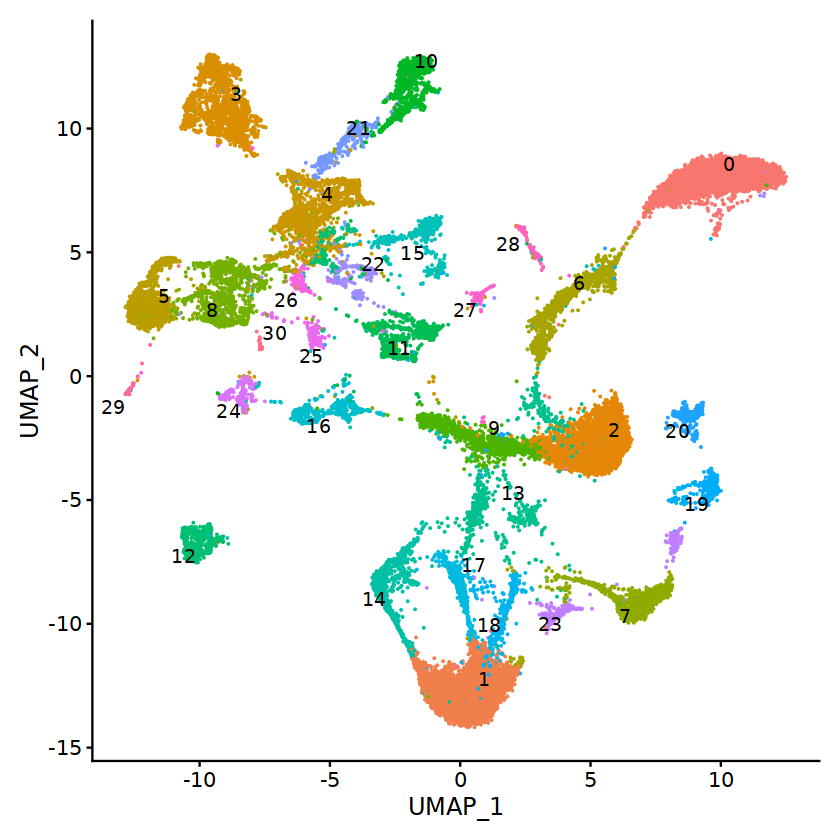

In [25]:
DimPlot(obj, reduction = "integrated.umap", label = T, repel = T) + NoLegend()

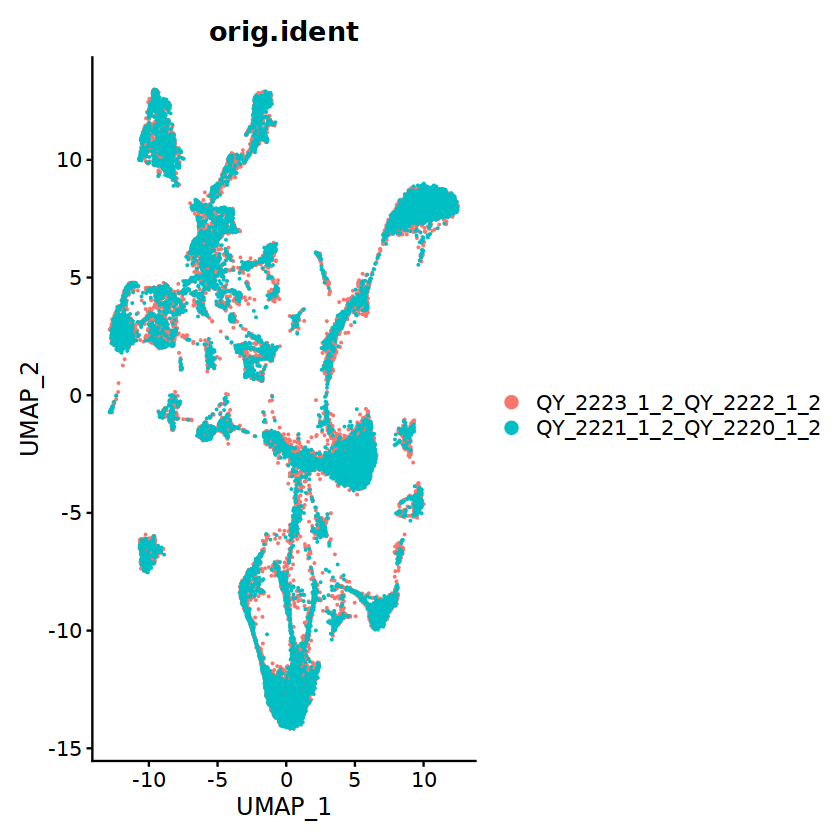

In [28]:
t1 <- DimPlot(obj, reduction = "integrated.umap", order = c("QY_2221_1_2_QY_2220_1_2", "QY_2223_1_2_QY_2222_1_2" ),
                                                        group.by = "orig.ident")
t1

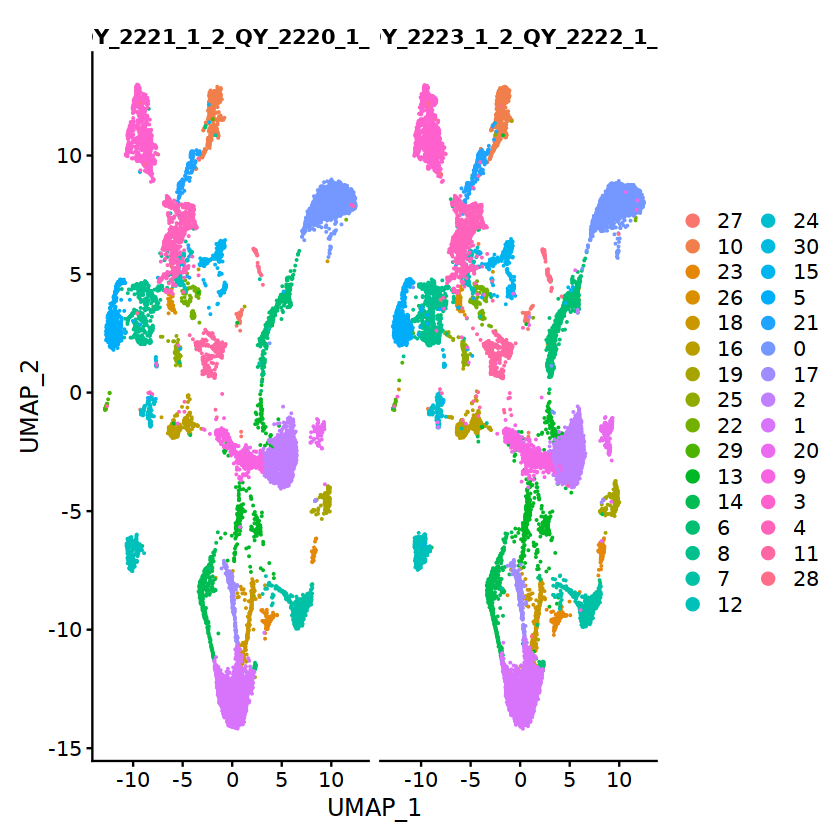

In [29]:
t1 <- DimPlot(obj, reduction = "integrated.umap", order = c("QY_2221_1_2_QY_2220_1_2", "QY_2223_1_2_QY_2222_1_2" ),
                                                        split.by = "orig.ident")
t1

In [30]:
obj

An object of class Seurat 
124150 features across 32636 samples within 4 assays 
Active assay: integrated (2000 features, 2000 variable features)
 3 other assays present: RNA, H3K27me3, H3K27ac
 2 dimensional reductions calculated: pca, integrated.umap

In [34]:
obj[['integrated']]
obj[['RNA']]
obj[['H3K27me3']]
obj[['H3K27ac']]

Assay data with 2000 features for 32636 cells
Top 10 variable features:
 Ttn, Myh6, Fgf12, Ryr2, Kcnj3, D830005E20Rik, Cdc20b, Car3, Mlip, Rbm20 

Assay data with 27405 features for 32636 cells
First 10 features:
 Xkr4, Gm1992, Gm19938, Gm37381, Rp1, Sox17, Gm37587, Gm37323, Mrpl15,
Lypla1 

ChromatinAssay data with 23296 features for 32636 cells
Variable features: 0 
Genome: 
Annotation present: TRUE 
Motifs present: FALSE 
Fragment files: 1 

Assay data with 71449 features for 32636 cells
First 10 features:
 chr1-3514511-3515425, chr1-3670705-3671174, chr1-3671301-3672079,
chr1-3913364-3914223, chr1-4408825-4409545, chr1-4412196-4413074,
chr1-4456478-4457389, chr1-4471192-4471869, chr1-4489814-4490155,
chr1-4490261-4490799 

In [35]:
dir.create('/projects/ps-epigen/users/cmiciano/Lung/lungmap_3/05_paired_tag_integ/')

In [37]:
Sys.time()
saveRDS(obj , "/projects/ps-epigen/users/cmiciano/Lung/lungmap_3/05_paired_tag_integ/231108_lung_pt_integ.RDS")
Sys.time()

[1] "2023-11-08 09:02:17 PST"

[1] "2023-11-08 09:04:09 PST"